In [1]:
import json
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format='retina'


In [2]:
data = []
with open('hltb.jsonlines') as lines:
        for line in lines:
                data.append(json.loads(line)) 

In [3]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,Name,Stats,steam_app_id,Release_date,Genres,Review_score
0,Borderlands 3,{'Additional Content': {'Moxxi's Heist of the ...,397540,2019-09-13,"First-Person, Action, Shooter",76
1,Dying Light,{'Additional Content': {'The Following': {'Pol...,239140,2015-01-27,"Action, Adventure, Open World, Survival Horror",78
2,Middle-Earth: Shadow of War,{'Additional Content': {'Blade of Galadriel': ...,356190,2017-10-10,"Action, Adventure",76
3,Counter-Strike: Global Offensive,"{'Multi-Player': {'Co-Op': {'Polled': '34', 'A...",730,2012-08-21,"First-Person, Shooter",74
4,Grand Theft Auto IV,{'Additional Content': {'The Lost and Damned':...,5152,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82


In [4]:
df.Stats

0        {'Additional Content': {'Moxxi's Heist of the ...
1        {'Additional Content': {'The Following': {'Pol...
2        {'Additional Content': {'Blade of Galadriel': ...
3        {'Multi-Player': {'Co-Op': {'Polled': '34', 'A...
4        {'Additional Content': {'The Lost and Damned':...
                               ...                        
60404                                     {'Platform': {}}
60405                                     {'Platform': {}}
60406    {'Single-Player': {'Main Story': {'Polled': '1...
60407    {'Single-Player': {'Main Story': {'Polled': '5...
60408    {'Single-Player': {'Main Story': {'Polled': '3...
Name: Stats, Length: 60409, dtype: object

In [5]:
#Convert nested dict into list of dicts format
#. I.e. {"Platform": {"Playstation 5": 5 hrs}} into [{"Platform_Playstation": 5}]
#test = df.iloc[0].Stats
def convert(list_dicts):
    total_dict = {}
    for h in list_dicts.keys():
        dict_1 = list_dicts[h].items()
        for i,j in dict_1: 
            for k,l in j.items():
                total_dict.update({f'{h}_{i}_{k}': l})
    return  total_dict
    
#convert(test)

In [6]:
total =  df.Stats.apply(lambda x: convert(x)).to_list()

In [7]:
#Let's find all the avaialable platforms
total =  df.Stats.apply(lambda x: convert(x)).to_list()
consoles_list = set([g.split('_')[1] for i in total for g in i.keys()  if "Platform" in g])
consoles_list

{'3DO',
 'Amazon Luna',
 'Amiga',
 'Amstrad CPC',
 'Apple II',
 'Arcade',
 'Atari 2600',
 'Atari 5200',
 'Atari 7800',
 'Atari 8-bit Family',
 'Atari Jaguar',
 'Atari Jaguar CD',
 'Atari Lynx',
 'Atari ST',
 'BBC Micro',
 'Browser',
 'ColecoVision',
 'Commodore 64',
 'Dreamcast',
 'Emulated',
 'FM Towns',
 'Game & Watch',
 'Game Boy',
 'Game Boy Advance',
 'Game Boy Color',
 'Gear VR',
 'Google Stadia',
 'Intellivision',
 'Interactive Movie',
 'MSX',
 'Mobile',
 'N-Gage',
 'NEC PC-88',
 'NEC PC-98',
 'NEC PC-FX',
 'NES',
 'Neo Geo',
 'Neo Geo CD',
 'Neo Geo Pocket',
 'Nintendo 3DS',
 'Nintendo 64',
 'Nintendo DS',
 'Nintendo GameCube',
 'Nintendo Switch',
 'Oculus Go',
 'Oculus Quest',
 'Odyssey',
 'OnLive',
 'Ouya',
 'PC',
 'PC VR',
 'Philips CD-i',
 'PlayStation',
 'PlayStation 2',
 'PlayStation 3',
 'PlayStation 4',
 'PlayStation 5',
 'PlayStation Now',
 'PlayStation Portable',
 'PlayStation VR',
 'PlayStation Vita',
 'Playdate',
 'Plug & Play',
 'SG-1000',
 'Sega 32X',
 'Sega CD',


In [8]:
total =  df.Stats.apply(lambda x: convert(x)).to_list()

#Let's keep only the primary keys for now as keeping all the keys would result in a very large and sparse dataset
keys_keep=  ['Single-Player_Main Story_Average', 'Single-Player_Main + Extras_Average', 'Single-Player_Completionist_Average',
    'Single-Player_Main Story_Rushed', 'Single-Player_All PlayStyles_Average', 'Speedruns_Any%_Average', 
    'Multi-Player_Co-Op_Average', 'Multi-Player_Competitive_Average', 'Platform_PC_Main', 
    'Platform_PlayStation 4_Main', 'Platform_PlayStation 5_Main', 'Platform_Xbox One_Main',
    'Platform_Xbox Series X/S_Main', 'Platform_Nintendo Switch_Main',
    'Platform_Xbox_Main', 'Platform_Xbox One_Main', 'Platform_Game Boy Advance_Main',
    'Platform_Mobile_Main', 'Platform_Xbox 360_Main', 'Platform_PlayStation 3_Main',
    'Platform_PlayStation 2_Main', 'Platform_PlayStation_Main', 'Platform_PlayStation Portable_Main',
    'Platform_PlayStation Vita_Main', 'Platform_Emulated_Main', 'Platform_Wii_Main']

total_keep= []
for g in total:
    temp = {}
    for i in keys_keep:
        for h in g:
            temp.update({i: g.get(i, '')})
    total_keep.append(temp)

In [9]:
df_final = pd.concat([df.drop(columns= ['Stats', 'steam_app_id']), pd.DataFrame(total_keep)], axis = 1)
df_final.head()

,Name,Release_date,Genres,Review_score,Single-Player_Main Story_Average,Single-Player_Main + Extras_Average,Single-Player_Completionist_Average,Single-Player_Main Story_Rushed,Single-Player_All PlayStyles_Average,Speedruns_Any%_Average,...,Platform_Game Boy Advance_Main,Platform_Mobile_Main,Platform_Xbox 360_Main,Platform_PlayStation 3_Main,Platform_PlayStation 2_Main,Platform_PlayStation_Main,Platform_PlayStation Portable_Main,Platform_PlayStation Vita_Main,Platform_Emulated_Main,Platform_Wii_Main
0,Borderlands 3,2019-09-13,"First-Person, Action, Shooter",76,23h 17m,47h 3m,77h 27m,16h 57m,43h 24m,,...,,,,,,,,,,
1,Dying Light,2015-01-27,"Action, Adventure, Open World, Survival Horror",78,18h 10m,37h 10m,58h 34m,11h 59m,32h 9m,4h 11m 15s,...,,,,,,,,,,
2,Middle-Earth: Shadow of War,2017-10-10,"Action, Adventure",76,20h 47m,37h 1m,56h 30m,12h 11m,38h 30m,2h 50m 9s,...,,,,,,,,,,
3,Counter-Strike: Global Offensive,2012-08-21,"First-Person, Shooter",74,,,,,,,...,,,,60h,,,,,,
4,Grand Theft Auto IV,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82,27h 37m,41h 24m,77h 4m,17h 50m,37h 48m,10h 40m 40s,...,,,29h 8m,28h 39m,,,,,,


In [10]:
errors_date = []
for i in df_final.Release_date.to_list():
    try:
        pd.to_datetime(i)
    except ValueError: 
        errors_date.append(i)
errors_date[:10]

['2004-12-00',
 '2004-03-00',
 '2016-02-00',
 '2019-12-00',
 '2017-00-00',
 '2021-08-00',
 '1996-00-00',
 '2019-00-00',
 '2021-00-00',
 '2014-00-00']

In [11]:
test_date = df_final.Release_date.to_list()
new = []
for index, value in enumerate(test_date):
    if value:
        split = value.split('-') # split into year, month, day
        if (int(split[0])== 0):
            new.append(np.nan)
            pass
        else:
            for index2,value2 in enumerate(split):
                if int(value2) == 0 and (split.index(value2) in [1,2]) : #If the day is 00 or month or day is 00            
                    split[index2] = '01'                
            new_text = '-'.join(split)
            new.append(new_text)
    else:
        new.append(np.nan)

In [12]:
#Check for errors
for i in new:
    try:
        pd.to_datetime(i)
    except: print(i)

In [13]:
df_final['Release_date'] =  pd.to_datetime(new)

In [14]:
def hours(x):
    total = []
    if x and isinstance(x, str):
        split = x.split()
        if 'h' in x and len(x.split()) <2:
            return int(x.replace('h', ''))
        elif 'm' in x and len(x.split()) <2:
            return int(x.replace('m', ''))/60
        elif len(x.split()) > 1:
            clean  = x.split()
            clean = int(clean[0].replace('h', '')) +  int(clean[1].replace('m', '')) / 60
            total.append(clean)
        return sum(total)
    else:
        return np.nan

In [15]:
df_final['Single-Player_Main Story_Average'] = df_final['Single-Player_Main Story_Average'].astype(str).apply(lambda x: hours(x)).astype(float)
df_final['Single-Player_All PlayStyles_Average'] =  df_final['Single-Player_All PlayStyles_Average'].astype(str).apply(lambda x: hours(x)).astype(float)

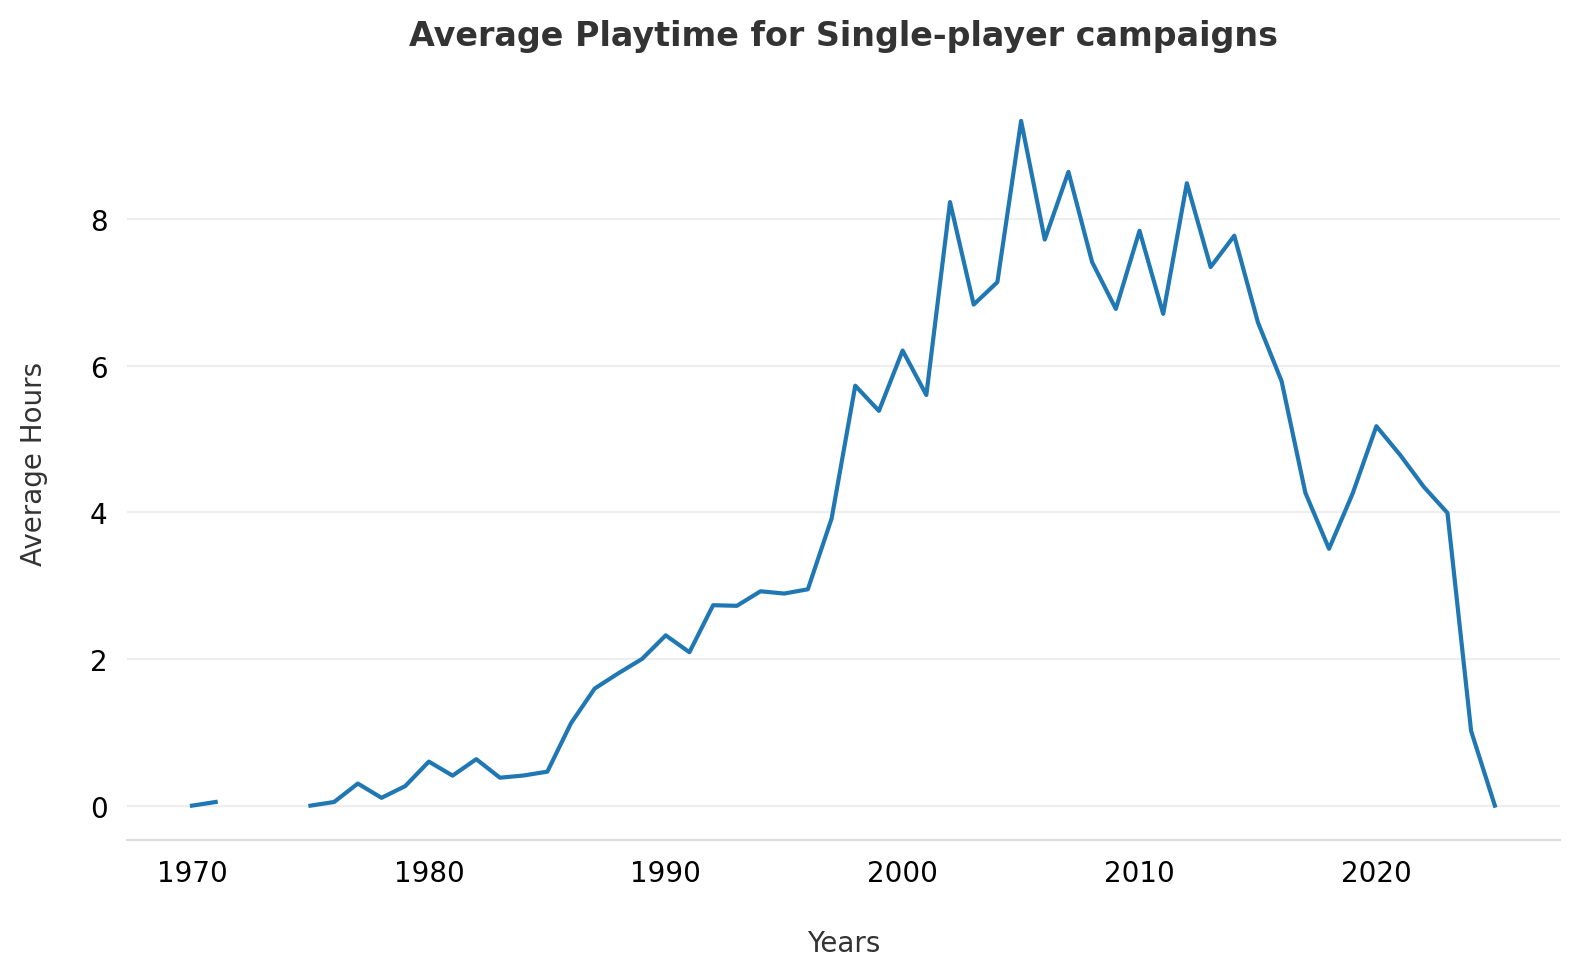

In [16]:
plt.rcParams['figure.figsize'] = (8, 5)

fig, ax = plt.subplots()

ax.plot(
    df_final[['Release_date','Single-Player_Main Story_Average']].set_index(
        'Release_date').resample('Y').mean()
)
# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Years', labelpad=15, color='#333333')
ax.set_ylabel('Average Hours', labelpad=15, color='#333333')
ax.set_title('Average Playtime for Single-player campaigns', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

Text(0.5, 1.0, 'Genres')

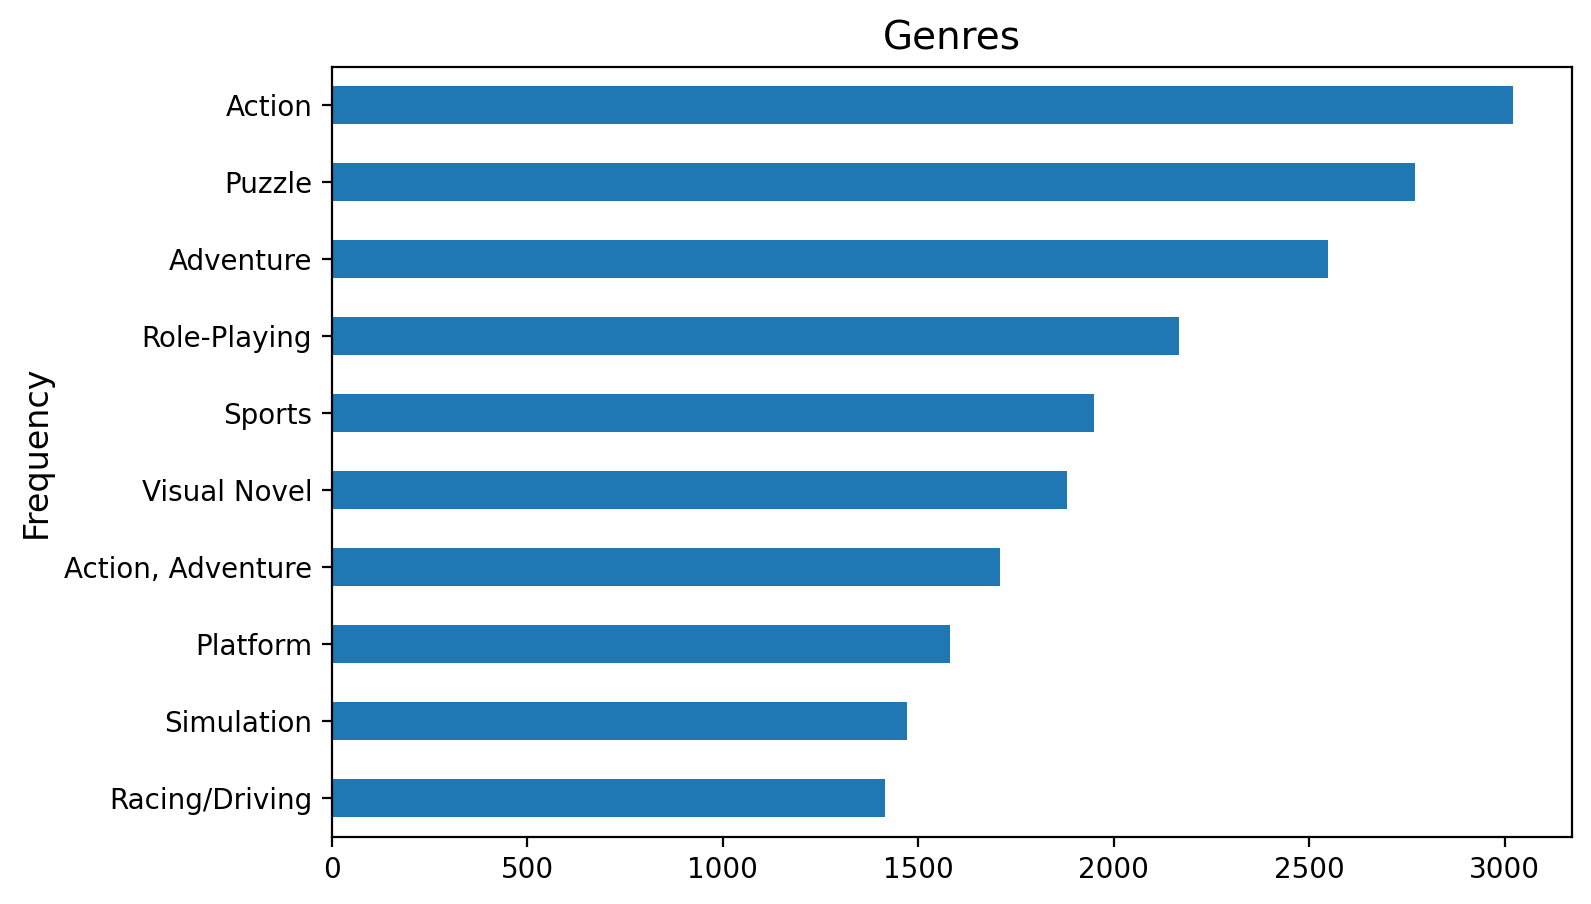

In [17]:
df.Genres.replace('',np.nan).dropna().value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.ylabel("Frequency", size = 12)
plt.title("Genres", size = 14)

In [20]:
df_final['Single-Player_All PlayStyles_Average'] = df_final['Single-Player_All PlayStyles_Average'].astype(str).apply(lambda x: hours(x))

In [21]:
total =  df.Stats.apply(lambda x: convert(x)).to_list()
consoles_list_edit = [f'Platform_{i}_Main' for i in consoles_list]
consoles_keep= []
for g in total:
    temp = {}
    for i in consoles_list_edit:
        for h in g:
            temp.update({i: g.get(i, '')})
    consoles_keep.append(temp)        

In [22]:
consoles_df = pd.concat([
    df.drop(columns=['steam_app_id', 'Stats']), 
    pd.DataFrame(consoles_keep).rename(columns = {i:i.split('_')[1] for i in consoles_list_edit})
                         ],axis=1)
consoles_df.columns

Index(['Name', 'Release_date', 'Genres', 'Review_score', 'PlayStation 4',
       'Xbox', 'N-Gage', 'Sega 32X', 'Super Nintendo', 'ZX Spectrum', '3DO',
       'Arcade', 'Dreamcast', 'Atari Jaguar CD', 'Game Boy', 'Sega CD',
       'Virtual Boy', 'Nintendo Switch', 'Sharp X68000', 'WonderSwan',
       'Atari Jaguar', 'Nintendo 64', 'MSX', 'Xbox 360', 'BBC Micro',
       'SG-1000', 'PC', 'Sega Mega Drive/Genesis', 'Wii U', 'Sharp X1',
       'Atari Lynx', 'Wii', 'Game Boy Advance', 'Game Boy Color',
       'PlayStation 2', 'ColecoVision', 'PlayStation 3', 'Oculus Go',
       'Nintendo GameCube', 'PlayStation Now', 'FM Towns', 'Neo Geo Pocket',
       'OnLive', 'Atari 2600', 'Amiga', 'Sega Master System', 'PlayStation VR',
       'Oculus Quest', 'Browser', 'Xbox One', 'Amstrad CPC', 'Atari 7800',
       'Neo Geo', 'Interactive Movie', 'Philips CD-i', 'Xbox Series X/S',
       'Google Stadia', 'PlayStation', 'Emulated', 'Atari 5200',
       'PlayStation Portable', 'Intellivision', 'NEC PC-F

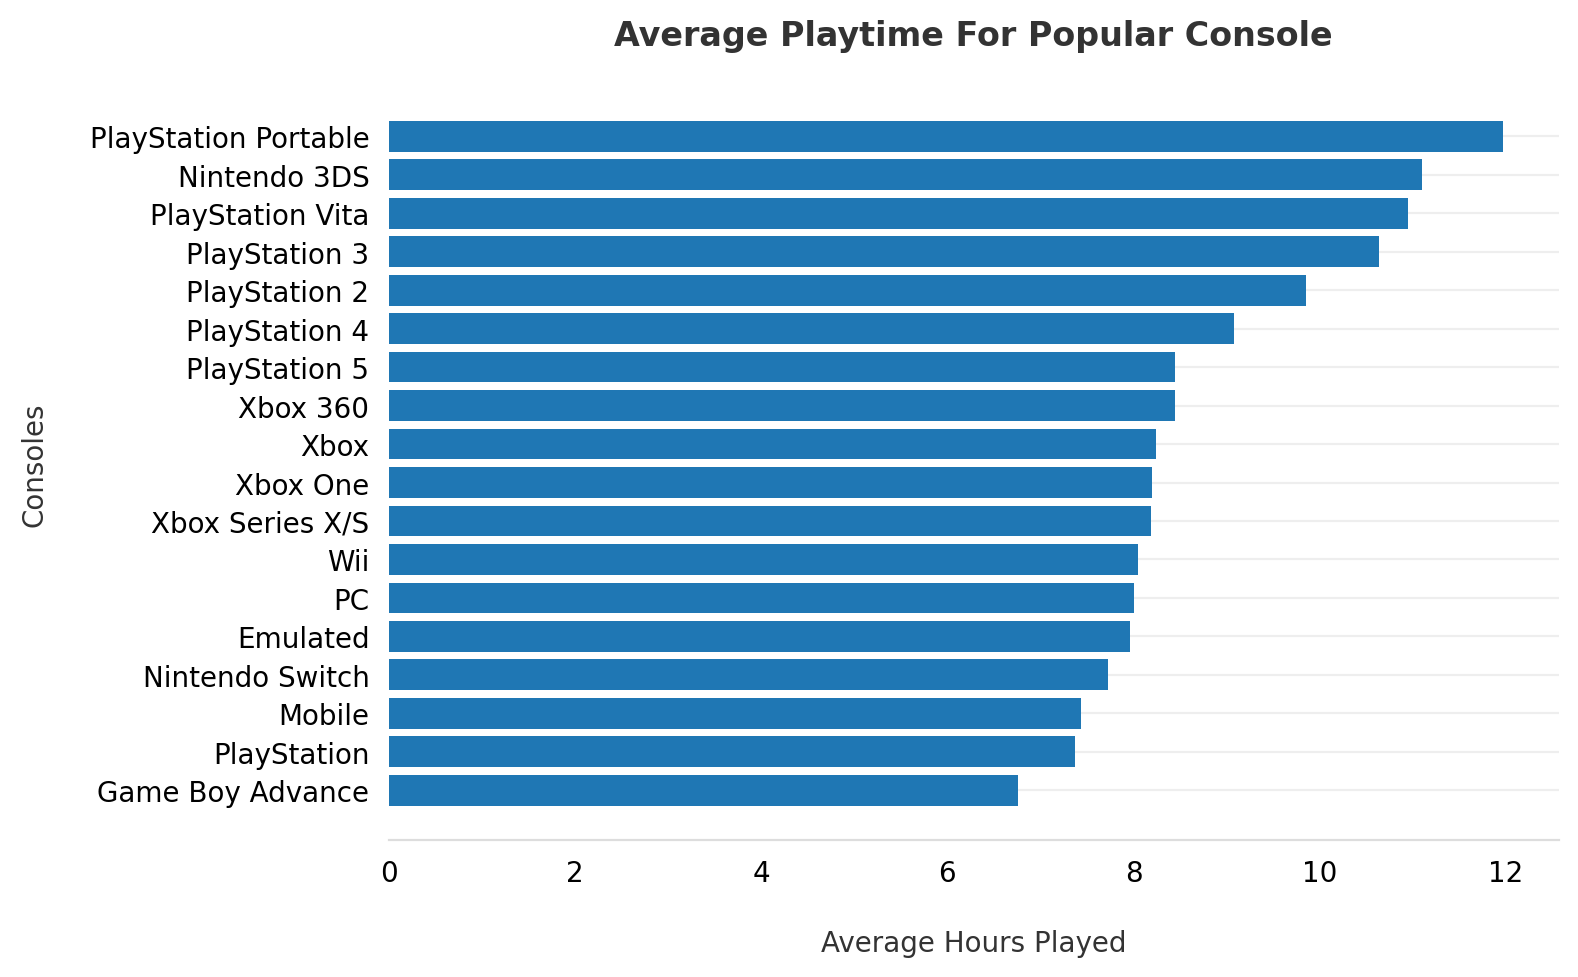

<Figure size 1280x960 with 0 Axes>

In [23]:
top_consoles = [
'PC', 'PlayStation 4', 'PlayStation 5', 
'Xbox One', 'Nintendo 3DS',
'Xbox Series X/S', 'Nintendo Switch',
'Xbox', 'Xbox One', 'Game Boy Advance',
'Mobile', 'Xbox 360', 'PlayStation 3',
'PlayStation 2', 'PlayStation', 'PlayStation Portable',
'PlayStation Vita', 'Emulated', 'Wii', ]

consoles_df_plot = consoles_df[top_consoles].applymap(
    lambda x: hours(x)).mean().sort_values(
        ascending= True)
        
fig, ax = plt.subplots()

ax.barh(
    y= consoles_df_plot.index,
    width=consoles_df_plot.values,
)

# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Average Hours Played', labelpad=15, color='#333333')
ax.set_ylabel('Consoles', labelpad=15, color='#333333')
ax.set_title('Average Playtime For Popular Console', pad=15, color='#333333',
             weight='bold')
plt.figure(figsize=(16,12), dpi= 80)
fig.tight_layout()